### Importación de datos



In [73]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [14]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda1, tienda2, tienda3, tienda4])

ingresos = df.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)

print("Ingresos totales por tienda:")
print(ingresos)


Ingresos totales por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


**1.1 Grafico del Análisis de facturación**

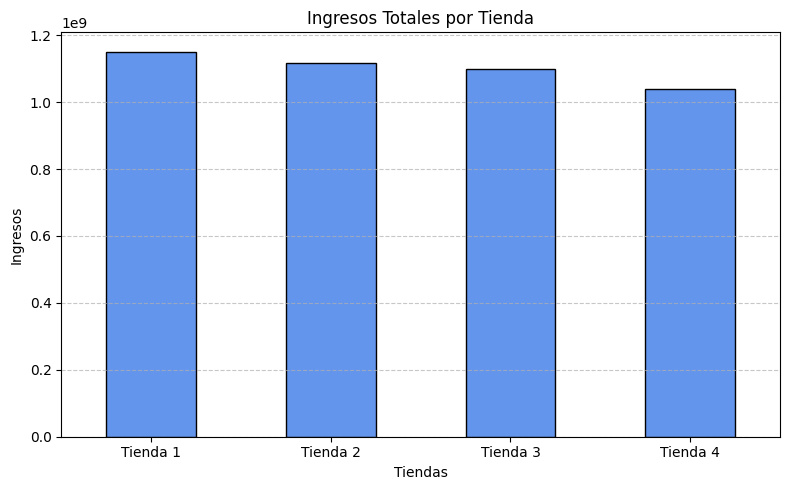

In [56]:
def mostrar_ingresos():
    ingresos_series = pd.Series(ingresos)
    plt.figure(figsize=(8, 5))
    ingresos_series.plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title('Ingresos Totales por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Ingresos')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

mostrar_ingresos()

# 2. Ventas por categoría

In [19]:
ventas_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría - Tienda 1")
print(ventas_categoria_tienda1)

ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("\nVentas por categoría - Tienda 2")
print(ventas_categoria_tienda2)

ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("\nVentas por categoría - Tienda 3")
print(ventas_categoria_tienda3)

ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("\nVentas por categoría - Tienda 4")
print(ventas_categoria_tienda4)


Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Ventas por categoría - Tienda 4
Categoría del Pro

**2.1 Grafico de Ventas por categoría**

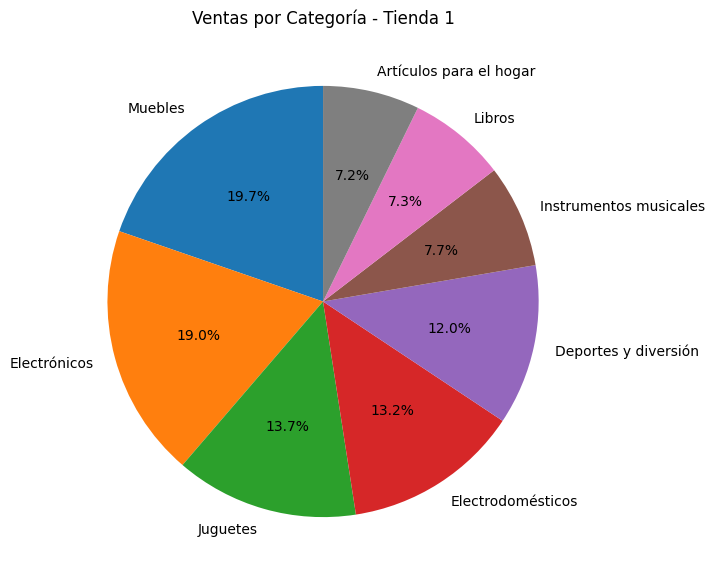

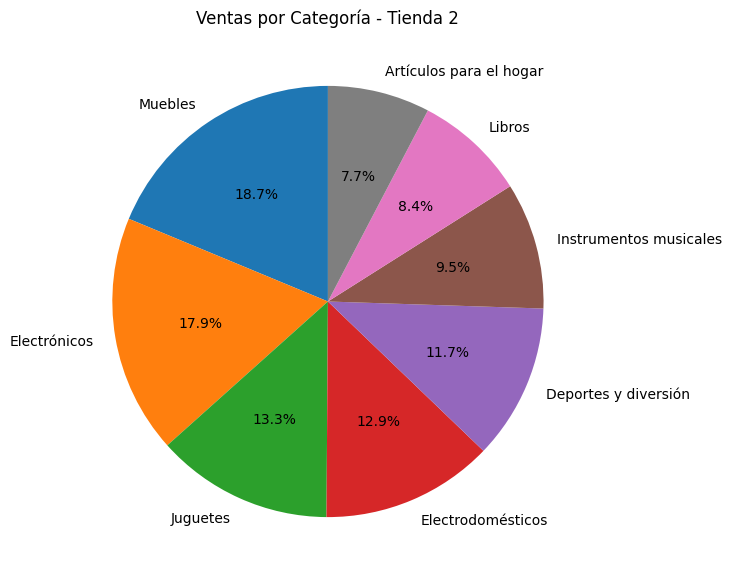

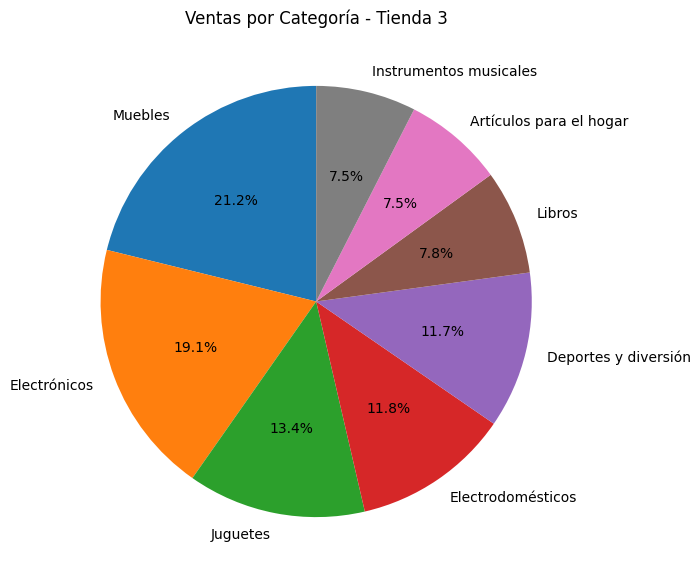

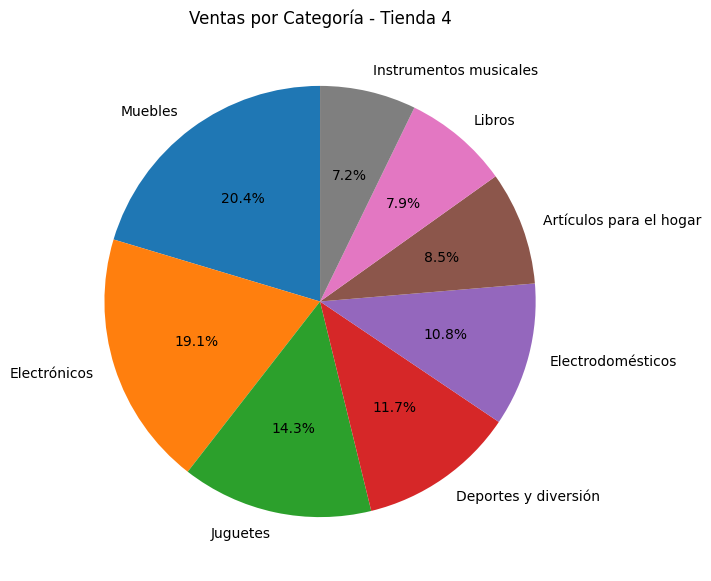

In [59]:
import matplotlib.pyplot as plt

def mostrar_ventas_por_categoria(ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4):
    ventas_por_tienda = [ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4]
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    for i, ventas in enumerate(ventas_por_tienda):
        plt.figure(figsize=(7,7))
        ventas.plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            legend=False
        )
        plt.title(f'Ventas por Categoría - {nombres_tiendas[i]}')
        plt.ylabel('')
        plt.show()

mostrar_ventas_por_categoria(ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4)




# 3. Calificación promedio de la tienda


In [20]:
valoracion_media_tienda1 = tienda1['Calificación'].mean()
valoracion_media_tienda2 = tienda2['Calificación'].mean()
valoracion_media_tienda3 = tienda3['Calificación'].mean()
valoracion_media_tienda4 = tienda4['Calificación'].mean()

print("Valoración media por tienda:")
print(f"Tienda 1: {valoracion_media_tienda1:.2f}")
print(f"Tienda 2: {valoracion_media_tienda2:.2f}")
print(f"Tienda 3: {valoracion_media_tienda3:.2f}")
print(f"Tienda 4: {valoracion_media_tienda4:.2f}")


Valoración media por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


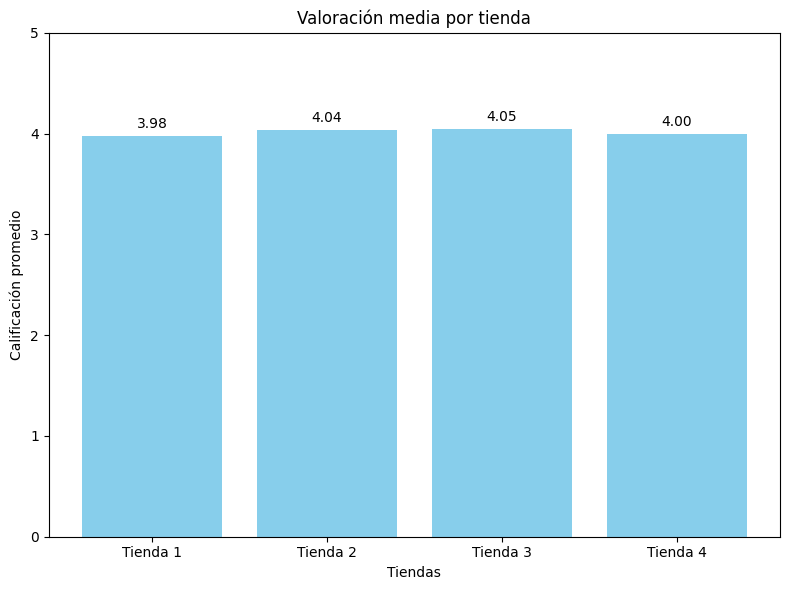

In [68]:
import matplotlib.pyplot as plt

def graficar_valoracion_media(valoracion_media_tienda1, valoracion_media_tienda2, valoracion_media_tienda3, valoracion_media_tienda4):
    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    valoraciones = [
        valoracion_media_tienda1,
        valoracion_media_tienda2,
        valoracion_media_tienda3,
        valoracion_media_tienda4
    ]

    plt.figure(figsize=(8, 6))
    barras = plt.bar(tiendas, valoraciones, color='skyblue')
    plt.ylim(0, 5)
    plt.title('Valoración media por tienda')
    plt.ylabel('Calificación promedio')
    plt.xlabel('Tiendas')

    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2.0, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
graficar_valoracion_media(valoracion_media_tienda1, valoracion_media_tienda2, valoracion_media_tienda3, valoracion_media_tienda4)


# 4. Productos más y menos vendidos

In [21]:

ventas_producto_tienda1 = tienda1.groupby('Producto').size().sort_values(ascending=False)
print("Productos más vendidos - Tienda 1:")
print(ventas_producto_tienda1.head())
print("\nProductos menos vendidos - Tienda 1:")
print(ventas_producto_tienda1.tail())

ventas_producto_tienda2 = tienda2.groupby('Producto').size().sort_values(ascending=False)
print("\nProductos más vendidos - Tienda 2:")
print(ventas_producto_tienda2.head())
print("\nProductos menos vendidos - Tienda 2:")
print(ventas_producto_tienda2.tail())

ventas_producto_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=False)
print("\nProductos más vendidos - Tienda 3:")
print(ventas_producto_tienda3.head())
print("\nProductos menos vendidos - Tienda 3:")
print(ventas_producto_tienda3.tail())

ventas_producto_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=False)
print("\nProductos más vendidos - Tienda 4:")
print(ventas_producto_tienda4.head())
print("\nProductos menos vendidos - Tienda 4:")
print(ventas_producto_tienda4.tail())


Productos más vendidos - Tienda 1:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64

Productos menos vendidos - Tienda 1:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
dtype: int64

Productos más vendidos - Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64

Productos menos vendidos - Tienda 2:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
dtype: int64

Productos más vendidos - Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64

Productos menos vendidos - Tienda 3:
Producto
Guita

**4.1 Grafico de productos más y menos vendidos **

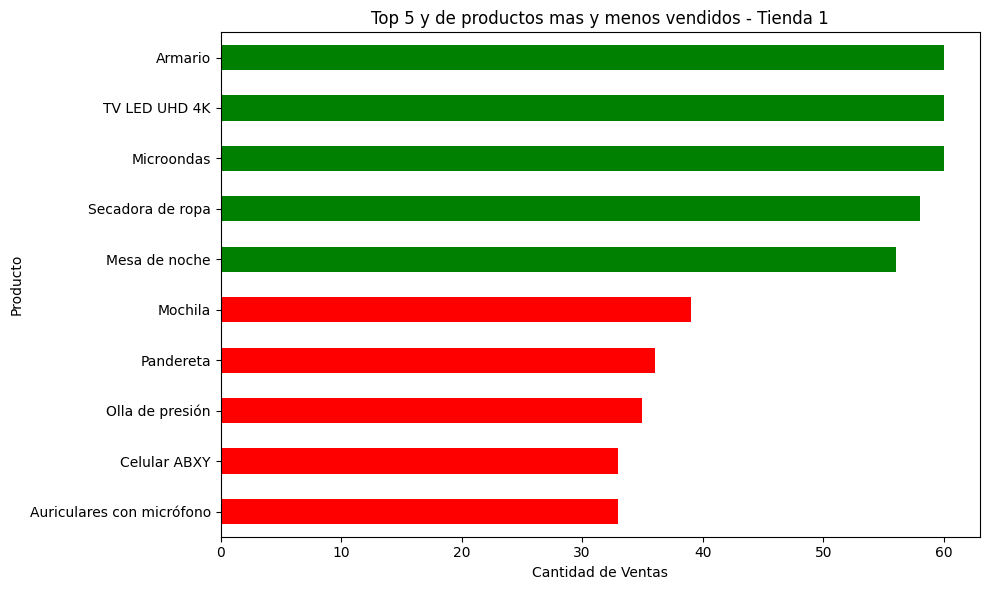

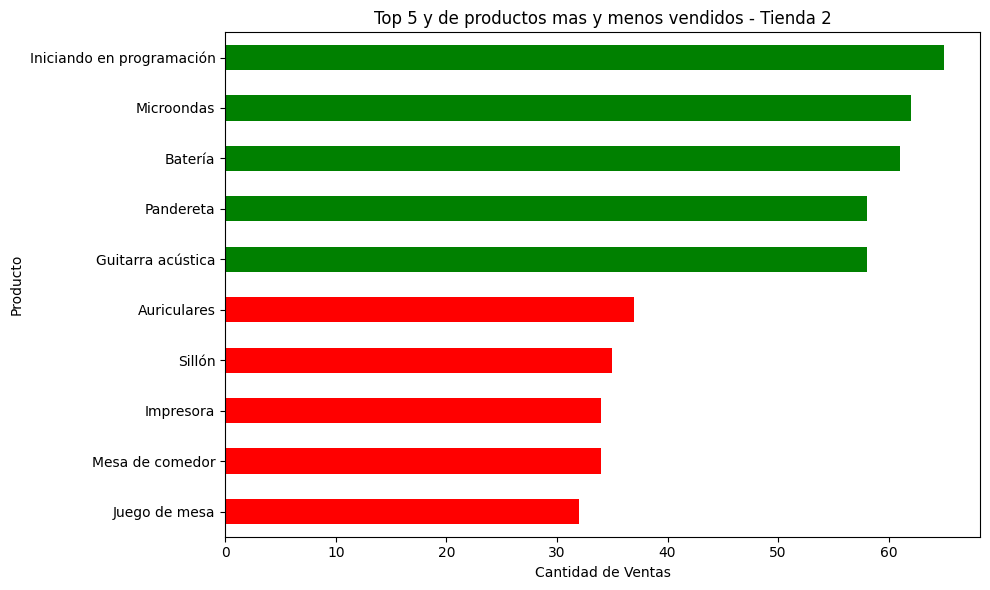

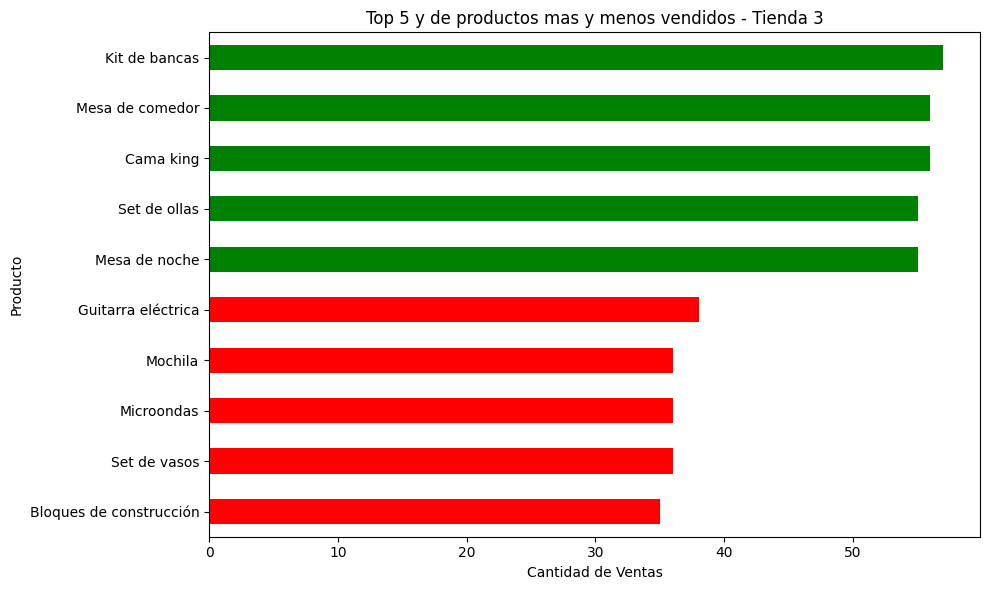

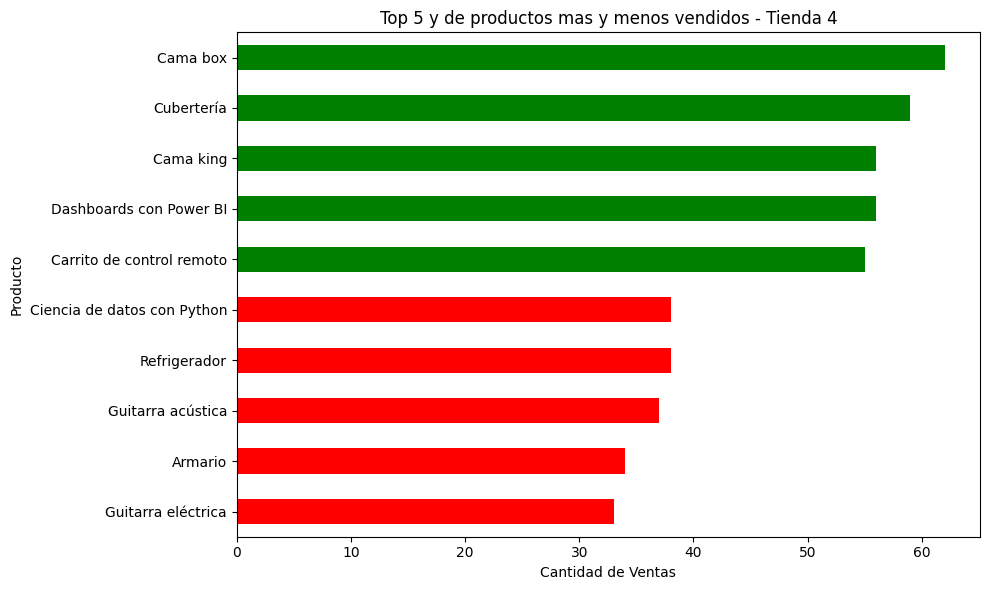

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_top_productos(ventas_tienda, nombre_tienda):

    ventas_ordenadas = ventas_tienda.sort_values(ascending=False)

    top_5 = ventas_ordenadas.head(5)
    bottom_5 = ventas_ordenadas.tail(5)

    df_grafico = pd.concat([top_5, bottom_5])

    colores = ['green'] * 5 + ['red'] * 5

    plt.figure(figsize=(10, 6))
    df_grafico.plot(kind='barh', color=colores)
    plt.xlabel('Cantidad de Ventas')
    plt.title(f'Top 5 y de productos mas y menos vendidos - {nombre_tienda}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

graficar_top_productos(ventas_producto_tienda1, 'Tienda 1')
graficar_top_productos(ventas_producto_tienda2, 'Tienda 2')
graficar_top_productos(ventas_producto_tienda3, 'Tienda 3')
graficar_top_productos(ventas_producto_tienda4, 'Tienda 4')


# 5. Envío promedio por tienda

In [22]:
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio - Tienda 1: ${envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio - Tienda 2: ${envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio - Tienda 3: ${envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio - Tienda 4: ${envio_promedio_tienda4:.2f}")


Costo de envío promedio - Tienda 1: $26018.61
Costo de envío promedio - Tienda 2: $25216.24
Costo de envío promedio - Tienda 3: $24805.68
Costo de envío promedio - Tienda 4: $23459.46


# Informe final


# **Introducción**
El propósito de este análisis es determinar cuál de las cuatro tiendas es la más adecuada para que el Sr. Juan venda sus productos. Para esto, se analizaron varios factores importantes: los ingresos totales de cada tienda, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio por tienda. Con esta información y los gráficos generados, se busca hacer una recomendación objetiva y fundamentada.





# **Desarrollo**
**Ingresos totales por tienda**:  
Los ingresos totales reflejan el volumen de ventas en términos monetarios. La tienda con mayores ingresos es la Tienda 1 con aproximadamente 1.15 mil millones, seguida por la Tienda 2, Tienda 3 y Tienda 4 respectivamente.



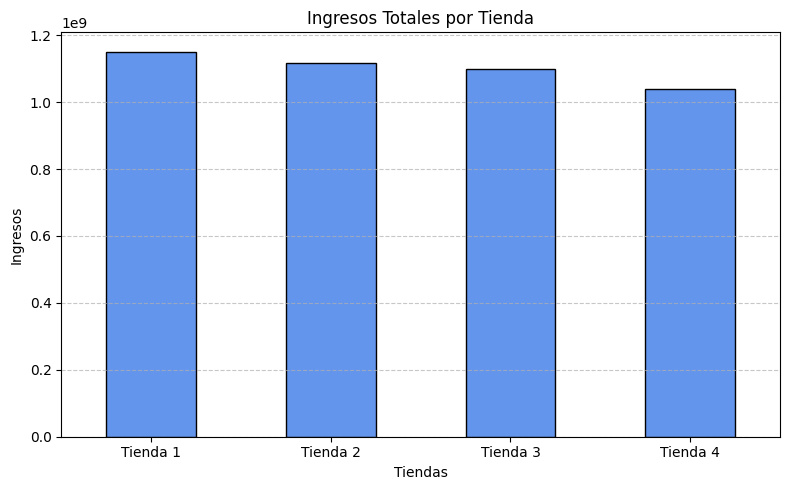

In [57]:
mostrar_ingresos()

**Ventas por categoría**:

En términos generales, la categoría de "Muebles" se posiciona como la más vendida en el conjunto de las cuatro tiendas, seguida por "Electrónicos" y "Juguetes", lo que refleja una fuerte demanda por productos relacionados con el hogar y el entretenimiento. No obstante, se observan variaciones específicas entre tiendas: por ejemplo, la Tienda 3 destaca con el mayor volumen de ventas en muebles, mientras que la Tienda 2 muestra un rendimiento sobresaliente en la categoría de instrumentos musicales, lo que sugiere diferencias en las preferencias de los clientes según la ubicación o el perfil del público objetivo.

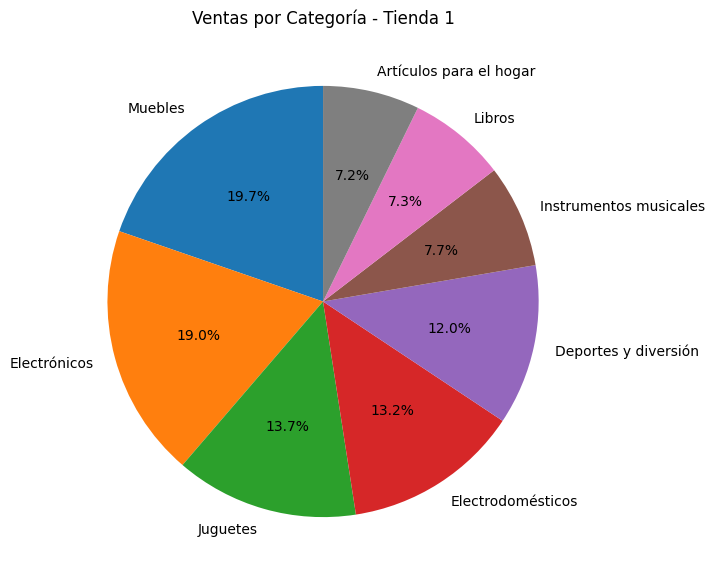

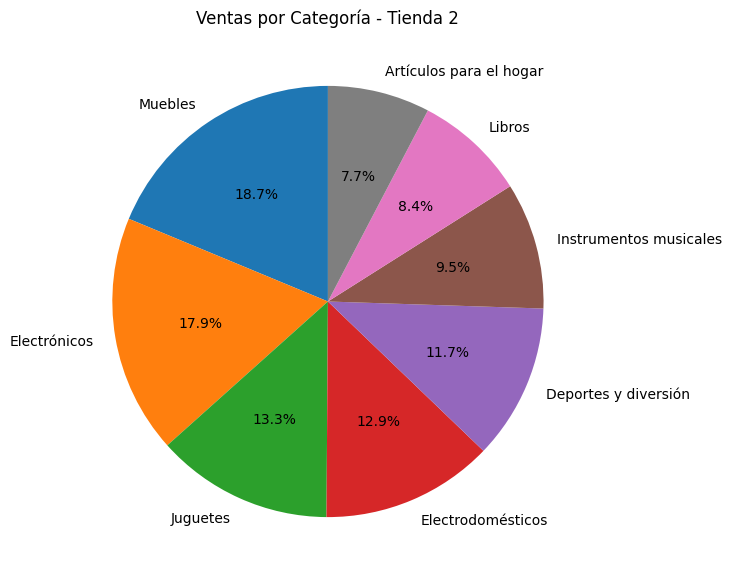

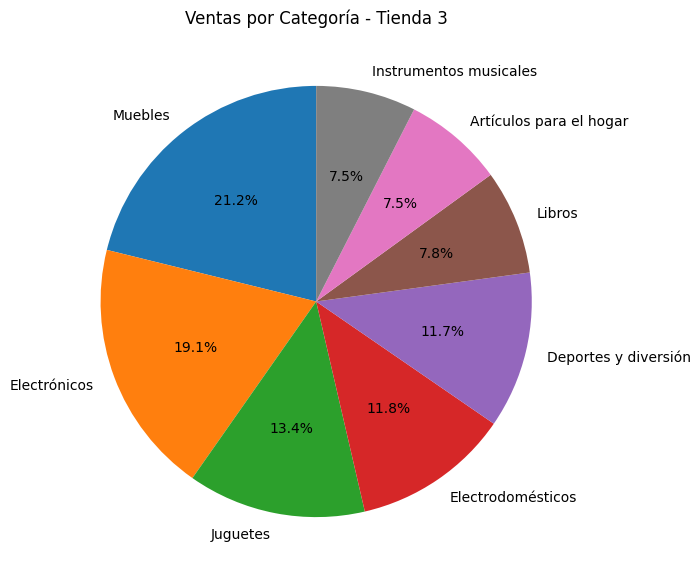

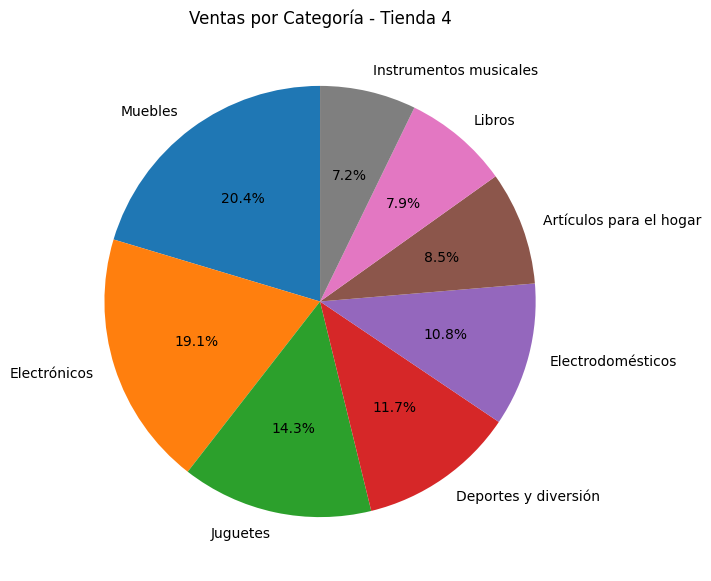

In [60]:
mostrar_ventas_por_categoria(ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4)


**Calificación promedio de la tienda**:

Las calificaciones de los clientes son un indicador clave de la satisfacción. La Tienda 3 tiene la mejor valoración promedio (4.05), seguida muy de cerca por la Tienda 2 (4.04), luego la Tienda 4 (4.00) y finalmente la Tienda 1 (3.98). Esto indica que, aunque la Tienda 1 tiene mayores ingresos, la satisfacción del cliente es un poco menor.


---



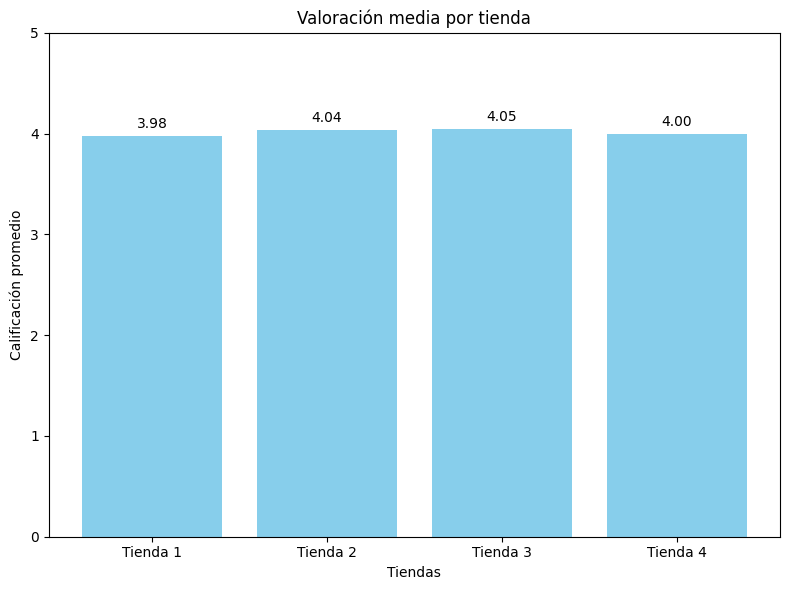

In [69]:
graficar_valoracion_media(valoracion_media_tienda1, valoracion_media_tienda2, valoracion_media_tienda3, valoracion_media_tienda4)


**Productos más y menos vendidos**:

**Tienda 1**:
La tienda muestra un alto rendimiento en la categoría de muebles, destacando especialmente los armarios. Además, los electrodomésticos y electrónicos como los televisores LED, microondas y secadoras de ropa se posicionan entre los más demandados, evidenciando una fuerte orientación hacia el equipamiento del hogar.
Por el contrario, los productos con menor rotación incluyen mochilas, panderetas, ollas de presión, y auriculares con micrófono, lo cual sugiere una baja preferencia por artículos escolares o de entretenimiento musical específico.

**Tienda 2:**
En esta tienda, si bien los productos electrónicos mantienen cifras destacadas, el producto más vendido es el libro "Iniciando en programación", reflejando un notable interés por la formación autodidacta en tecnología. También se observa buena acogida de instrumentos musicales como la pandereta y la guitarra acústica.
En contraste, los menos vendidos incluyen el segundo juego de mesa, mesa de comedor, impresoras y sillones, lo cual puede indicar menor demanda en artículos no esenciales o de mayor tamaño.

**Tienda 3:**
Los consumidores muestran una clara preferencia por productos del hogar, siendo los más vendidos los muebles, bancas y ollas, lo que apunta a un enfoque práctico y funcional.
Entre los productos menos vendidos se encuentran los bloques de construcción, sets de vasos, microondas y mochilas, indicando una baja demanda en juguetes y utensilios de cocina específicos.

 **Tienda 4**:
Esta tienda mantiene una tendencia similar a la anterior, con altos volúmenes de ventas en camas, cubiertos y otros artículos para el hogar, lo que refuerza su perfil de tienda orientada al abastecimiento doméstico básico.
Sin embargo, registra bajas ventas en guitarras eléctricas y acústicas, armarios, refrigeradoras, y el libro "Ciencia de datos con Python", lo que puede señalar un desinterés hacia productos especializados y de mayor precio o complejidad.



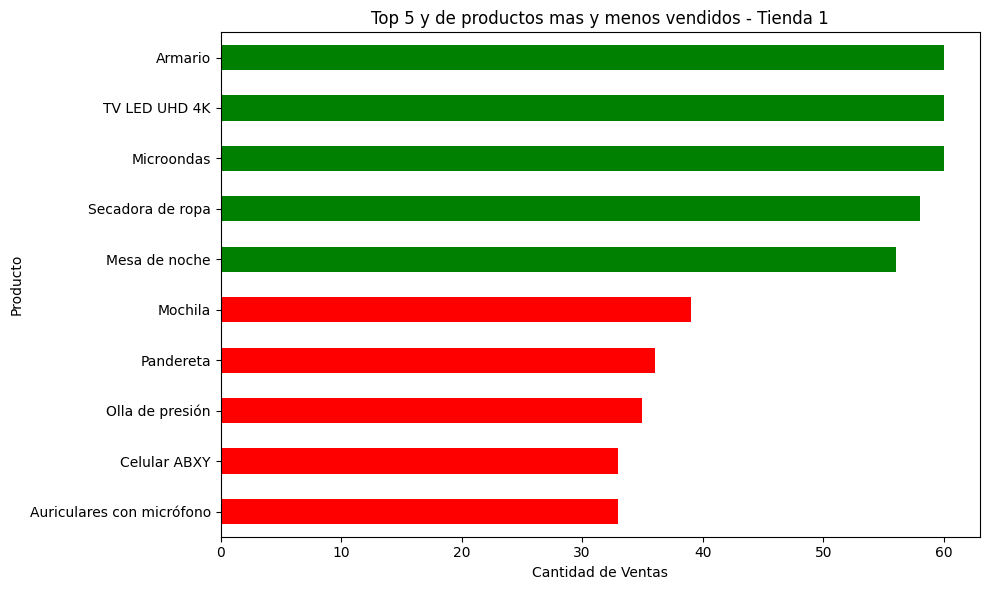

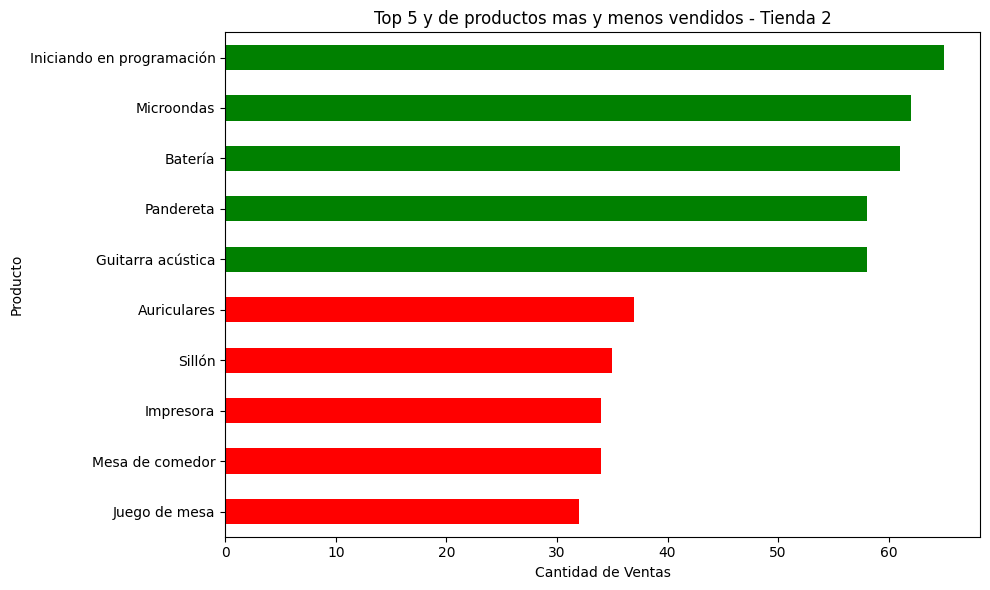

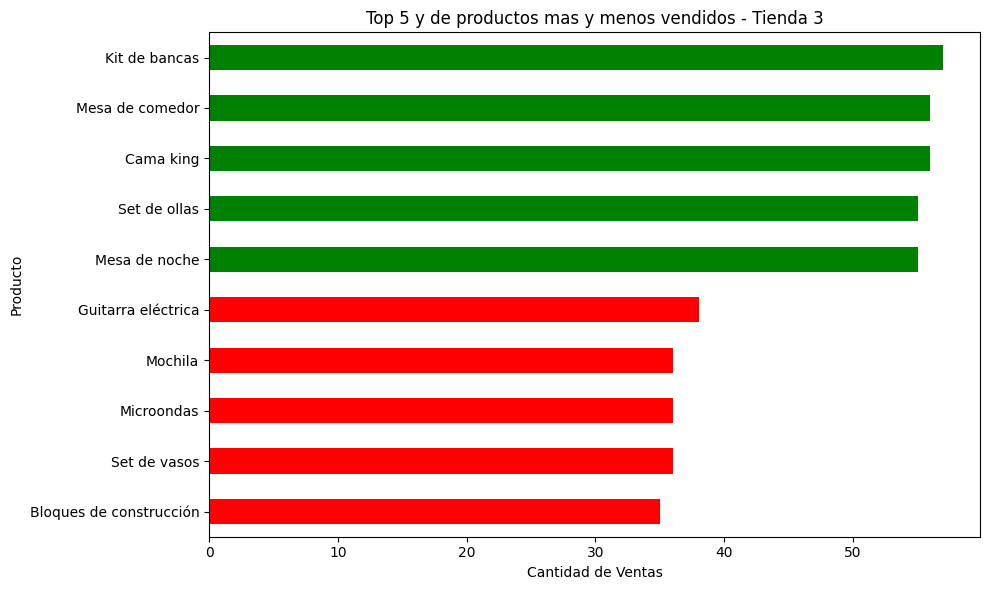

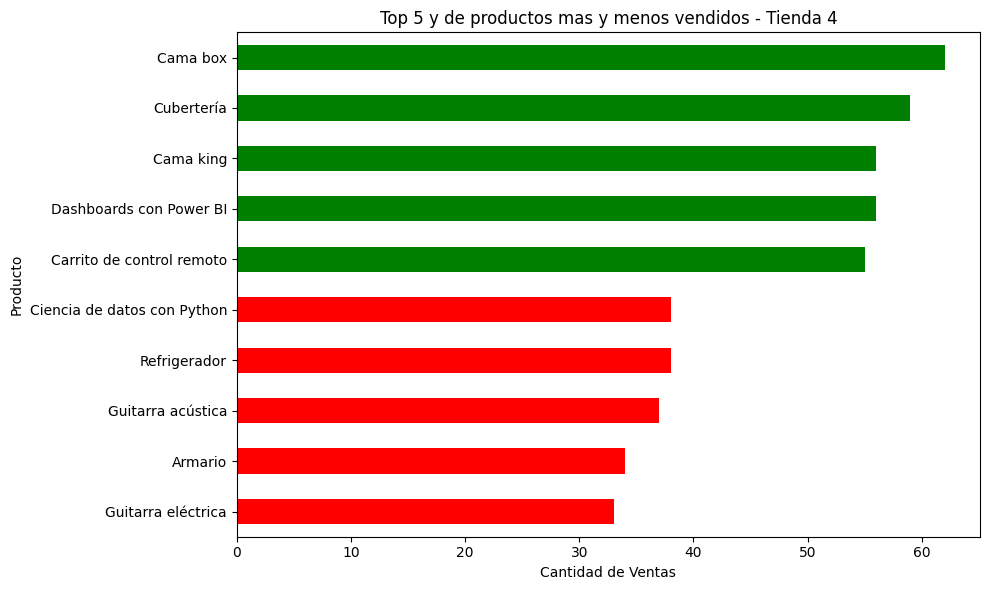

In [65]:
graficar_top_productos(ventas_producto_tienda1, 'Tienda 1')
graficar_top_productos(ventas_producto_tienda2, 'Tienda 2')
graficar_top_productos(ventas_producto_tienda3, 'Tienda 3')
graficar_top_productos(ventas_producto_tienda4, 'Tienda 4')


**Coste de Envío Promedio por Tienda**:

El coste de envío es un factor clave tanto en la experiencia del cliente como en la rentabilidad operativa. Entre las cuatro tiendas analizadas, la Tienda 4 presenta el coste de envío promedio más bajo con $23,459.46, lo que puede representar una ventaja competitiva al momento de atraer consumidores sensibles al precio final.

En contraste, la Tienda 1 registra el coste promedio de envío más elevado, alcanzando los $26,018.61.

Esta diferencia significativa de más de $2,500 por pedido en promedio podría influir negativamente en la percepción de valor por parte del cliente y afectar su decisión de compra, especialmente si no se compensa con promociones, tiempos de entrega más rápidos o mejor servicio.

Optimizar esta variable puede representar una oportunidad clara para mejorar tanto la fidelización como el volumen de ventas, ya que los consumidores tienden a inclinarse por opciones con menores costes adicionales.










# Conclusión

Después de realizar un análisis detallado de las ventas por producto, categoría y los costos de envío en las cuatro tiendas evaluadas, se concluye que la Tienda 4 representa la opción más recomendable para enfocar los esfuerzos de venta y expansión comercial. Esta recomendación se fundamenta en diversos factores que en conjunto le otorgan una ventaja competitiva significativa frente a las demás.

En primer lugar, la Tienda 4 cuenta con el costo de envío promedio más bajo entre todas las tiendas analizadas. Este aspecto no solo mejora la experiencia de compra del cliente, sino que puede influir directamente en la decisión de compra, ya que los consumidores tienden a preferir opciones con menores costos finales. Esto representa una oportunidad estratégica para atraer a más clientes y mejorar la rentabilidad de cada transacción.

Además, los datos muestran que la Tienda 4 mantiene una alta demanda en productos del hogar, especialmente en artículos como camas, cubiertos y mobiliario. Esta tendencia refleja una orientación clara hacia las necesidades cotidianas de los consumidores, lo que garantiza una rotación constante del inventario y mayor estabilidad en las ventas. A diferencia de otras tiendas que concentran sus ventas en categorías específicas, la Tienda 4 demuestra un equilibrio saludable entre distintas líneas de productos, incluyendo también electrónicos y libros, lo que permite diversificar el riesgo ante cambios en la demanda.

En conjunto, estos elementos convierten a la Tienda 4 en la mejor candidata para fortalecer la estrategia de ventas. Su combinación de costos competitivos, alta rotación de productos esenciales y diversidad en la oferta le confiere una posición sólida en el mercado y un mayor potencial de crecimiento a largo plazo.

# Análisis del desempeño geográfico

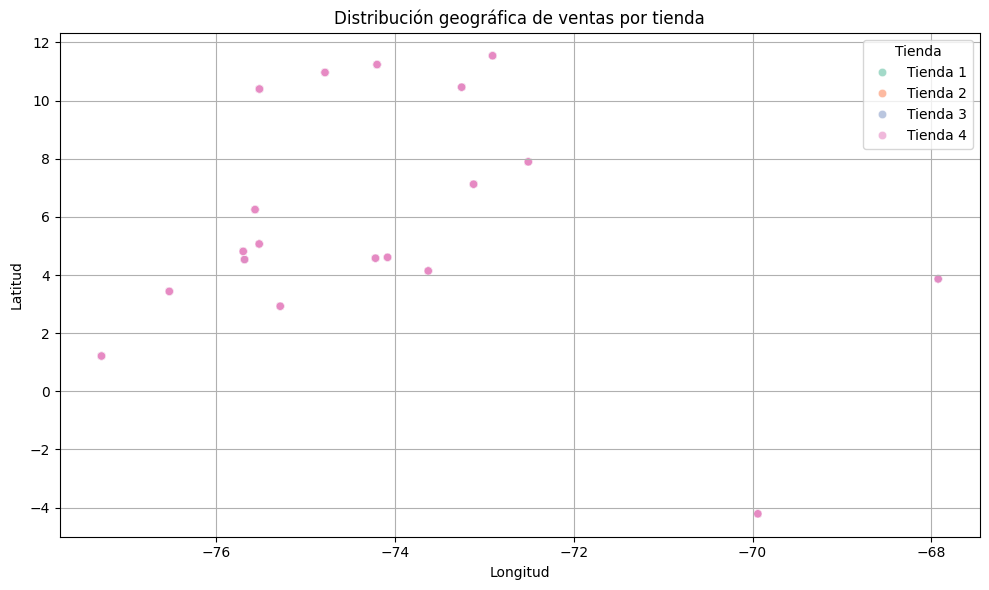

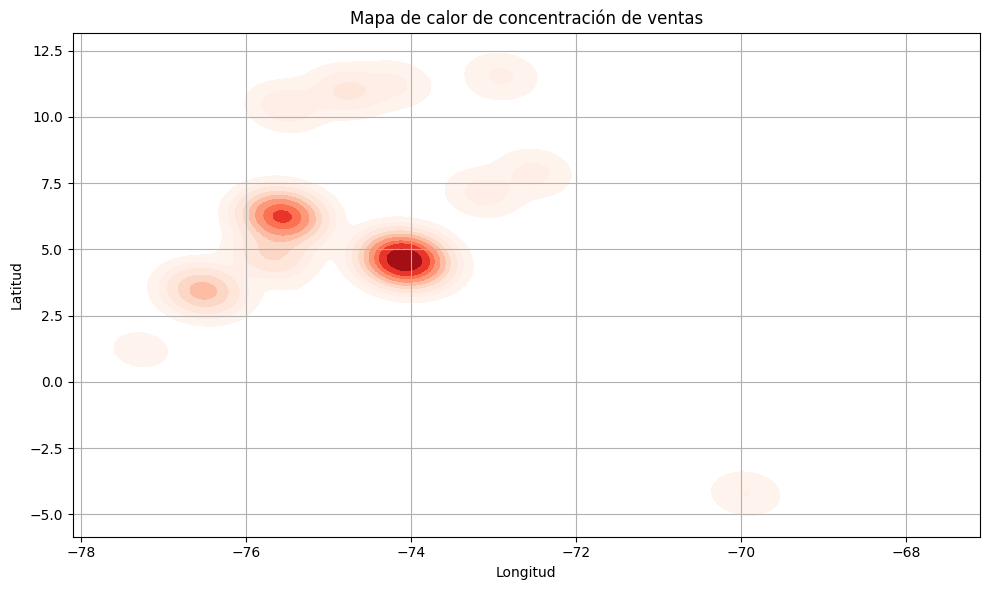

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

datos_geo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


datos_geo['Ingresos'] = datos_geo['Precio'] * datos_geo['Cantidad de cuotas']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_geo, x='lon', y='lat', hue='Tienda', alpha=0.6, palette='Set2')
plt.title('Distribución geográfica de ventas por tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos_geo, x='lon', y='lat', fill=True, cmap='Reds', thresh=0.05)
plt.title('Mapa de calor de concentración de ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()



